In [1]:
import sqlite3
from pathlib import Path

__file__ = %pwd
DATA = Path(__file__).parent.parent / "data"
PRIORITIES = DATA / "Priorities"
DATABASE = DATA / "databases" / "exploration.db"
con = sqlite3.connect(DATABASE)
cur = con.cursor()

In [2]:
import pandas as pd
import numpy as np

# Load the data from the SQLite database by year
df_2017_18 = pd.read_sql_query("SELECT * FROM ACGRWide WHERE Year = '2017-18'", con)
columns_to_drop = [col for col in df_2017_18.columns if col.startswith("UniReqs") or col.startswith("RegHSDiploma") or col.startswith("Dropout")]

# Lasso

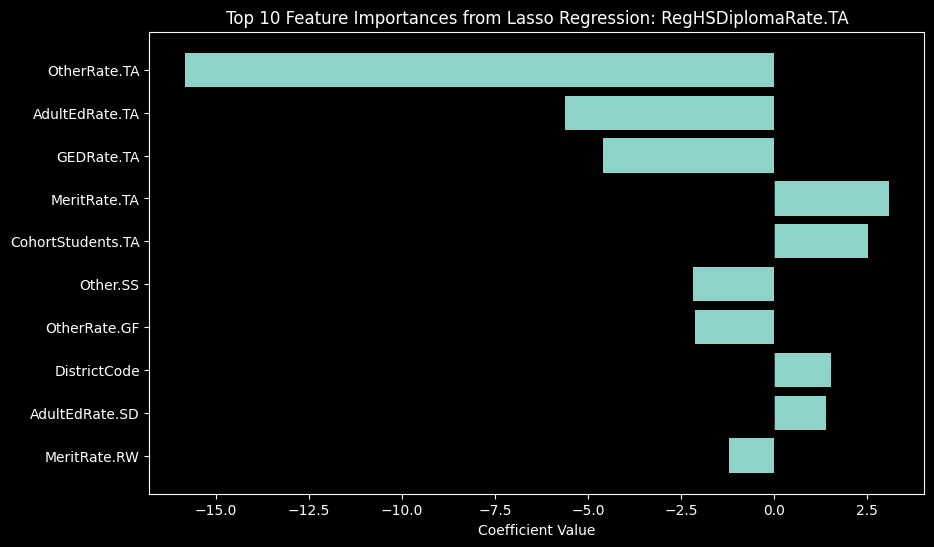

R^2 Score: -2.7204305297345854e-07
Mean Squared Error: 762.1743253670676
Root Mean Squared Error: 27.60750487398431


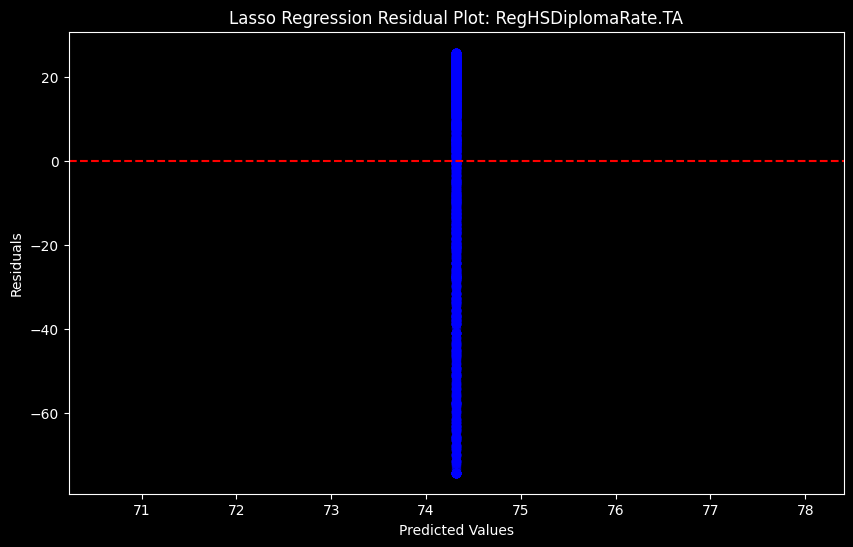

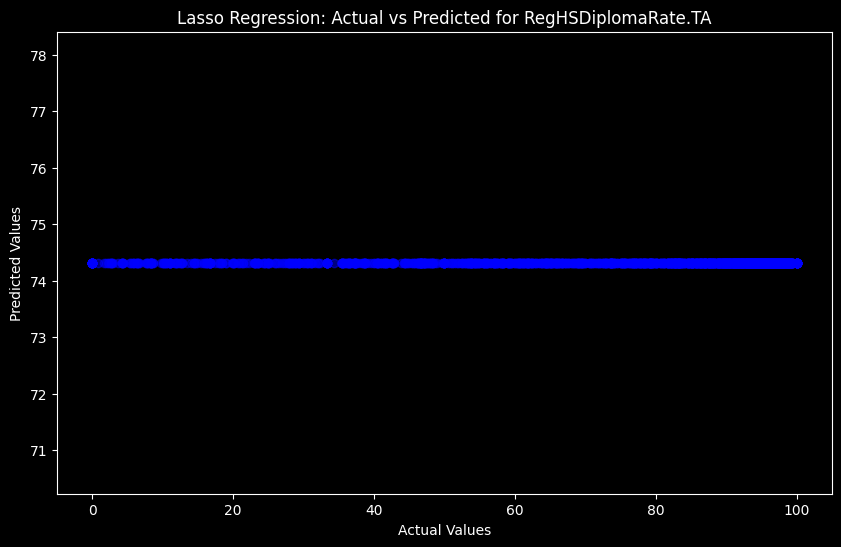

In [3]:
import utils.lasso as lasso_utils

target_column = "RegHSDiplomaRate.TA"

X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df_2017_18, target_column, columns_to_drop
)
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")
lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

### CSU/UC Graduation Rate

c:\School\STATS 170A\DS-Capstone-Project\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111.2681525861844, tolerance: 751.3050611294684
  model = cd_fast.enet_coordinate_descent_gram(


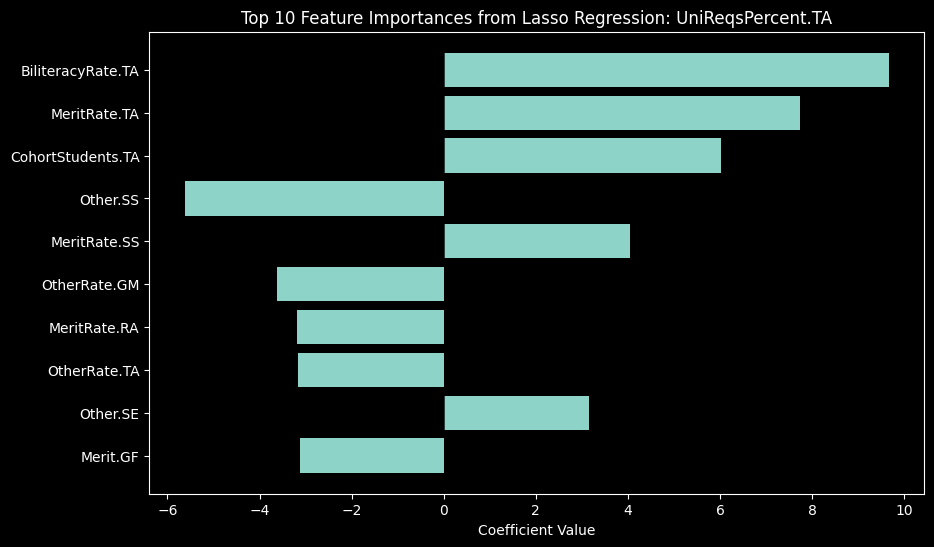

R^2 Score: 0.006989944821651606
Mean Squared Error: 1037.3099267547295
Root Mean Squared Error: 32.207296172680024


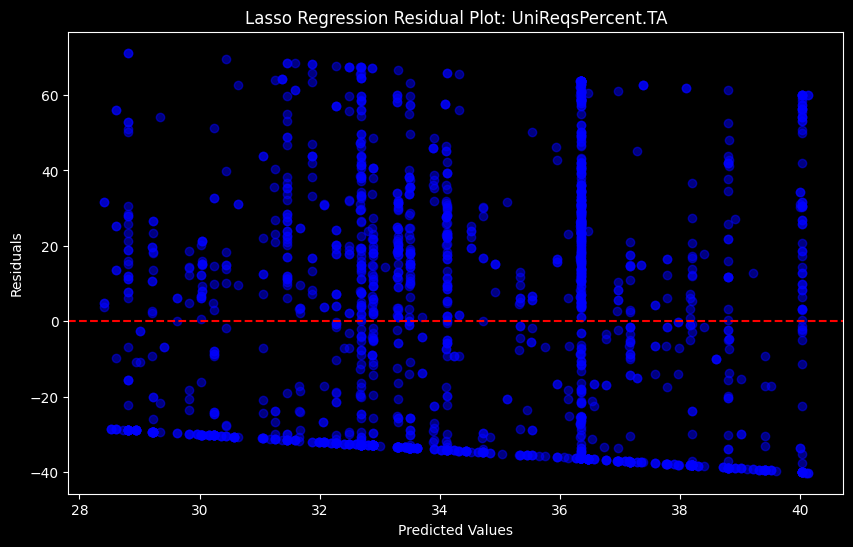

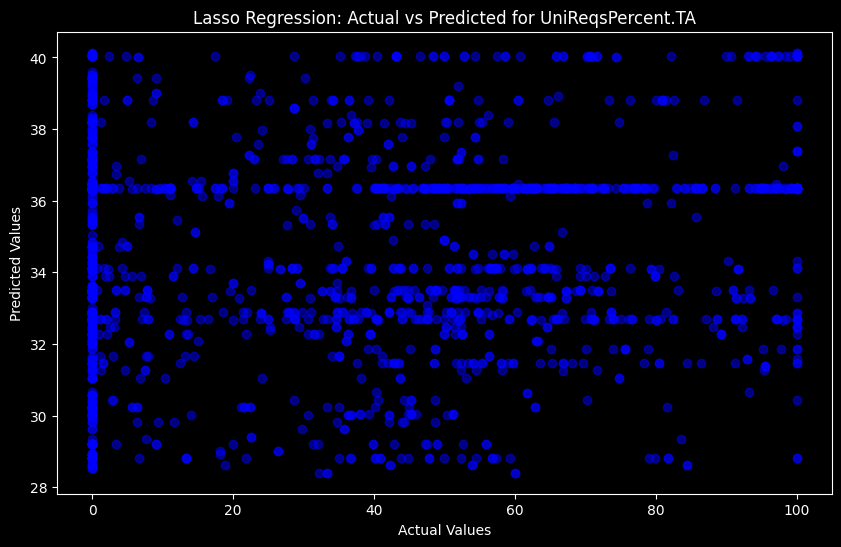

In [4]:
# Update the target column
target_column = "UniReqsPercent.TA"

# Fit the Lasso model for the new target column
X_numeric, y, sorted_pairs = lasso_utils.fit_lasso_model(
    df_2017_18, target_column, columns_to_drop
)

# Plot the Lasso coefficients
lasso_utils.plot_lasso_coefficients(target_column, sorted_pairs)
lasso_model = lasso_utils.LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_results = lasso_utils.train_and_evaluate_lasso_model(X_numeric, y, lasso_model)
print(f"R^2 Score: {lasso_results['r2']}")
print(f"Mean Squared Error: {lasso_results['mse']}")
print(f"Root Mean Squared Error: {lasso_results['rmse']}")

lasso_utils.plot_lasso_residuals(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)
lasso_utils.plot_actual_predicted_lasso(
    lasso_results["y_test"], lasso_results["y_pred"], target_column
)

# XGBoost

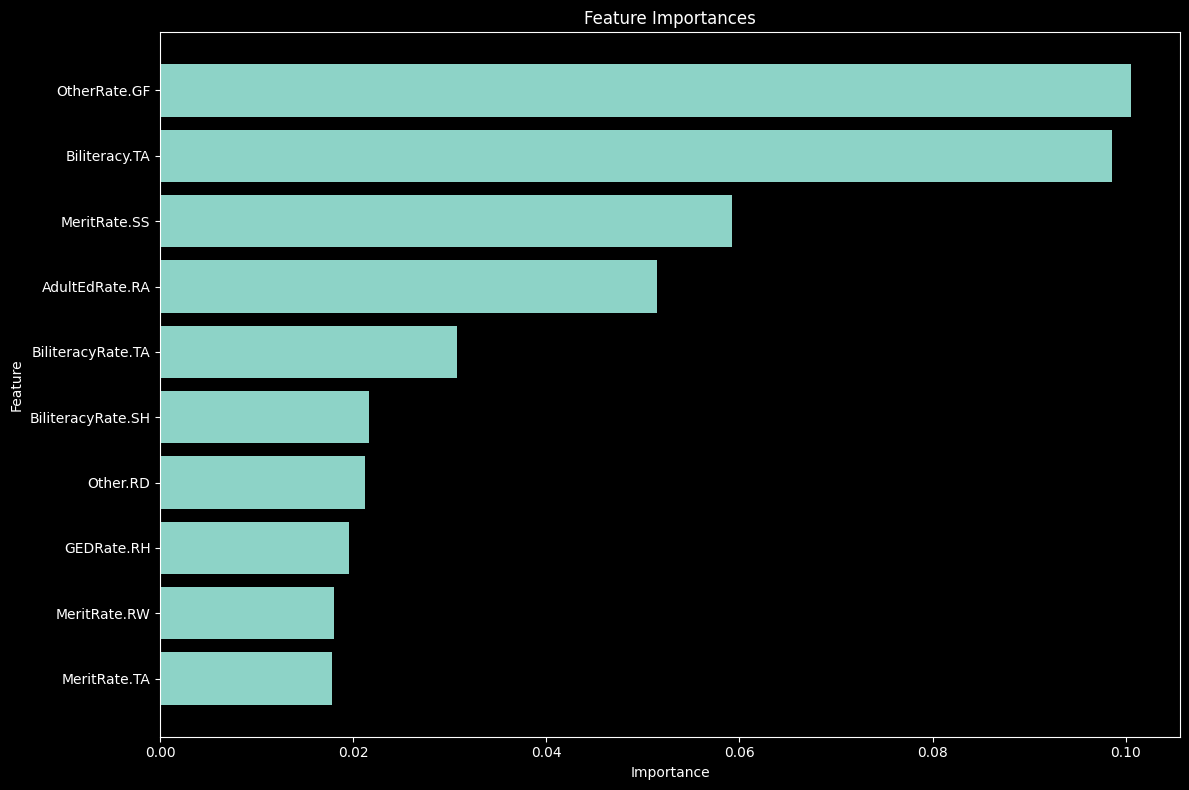

{'MSE': 63.42727332719141, 'RMSE': np.float64(7.964124140619068), 'MAE': 4.932852047906857, 'R^2': 0.9392814832270096}


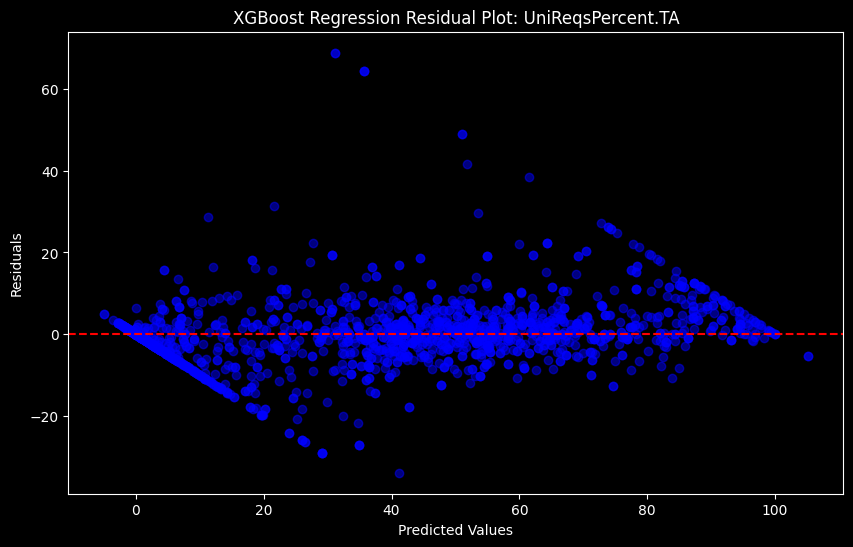

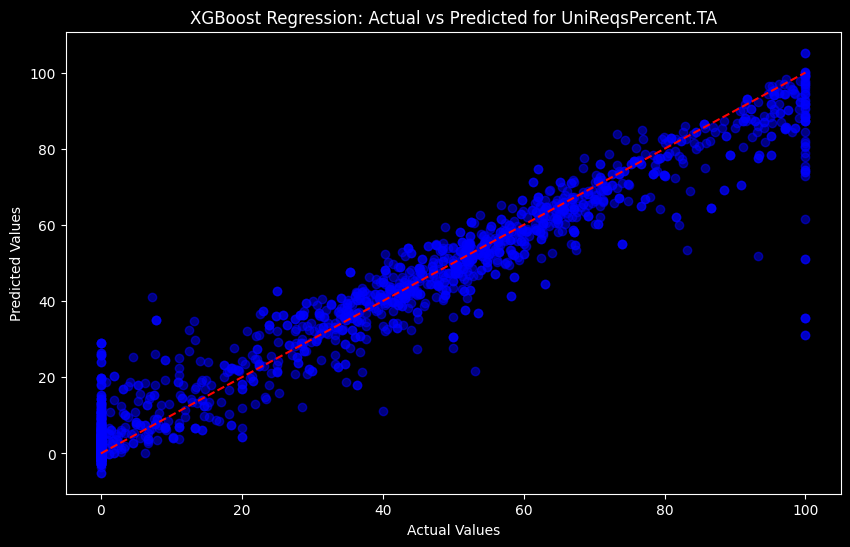

In [5]:
import utils.xgboost as xgb_utils

target_column = "UniReqsPercent.TA"
xgb_results = xgb_utils.train_xgboost_model(df_2017_18, target_column, columns_to_drop)
print(xgb_results["metrics"])
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

## Graduation Rate

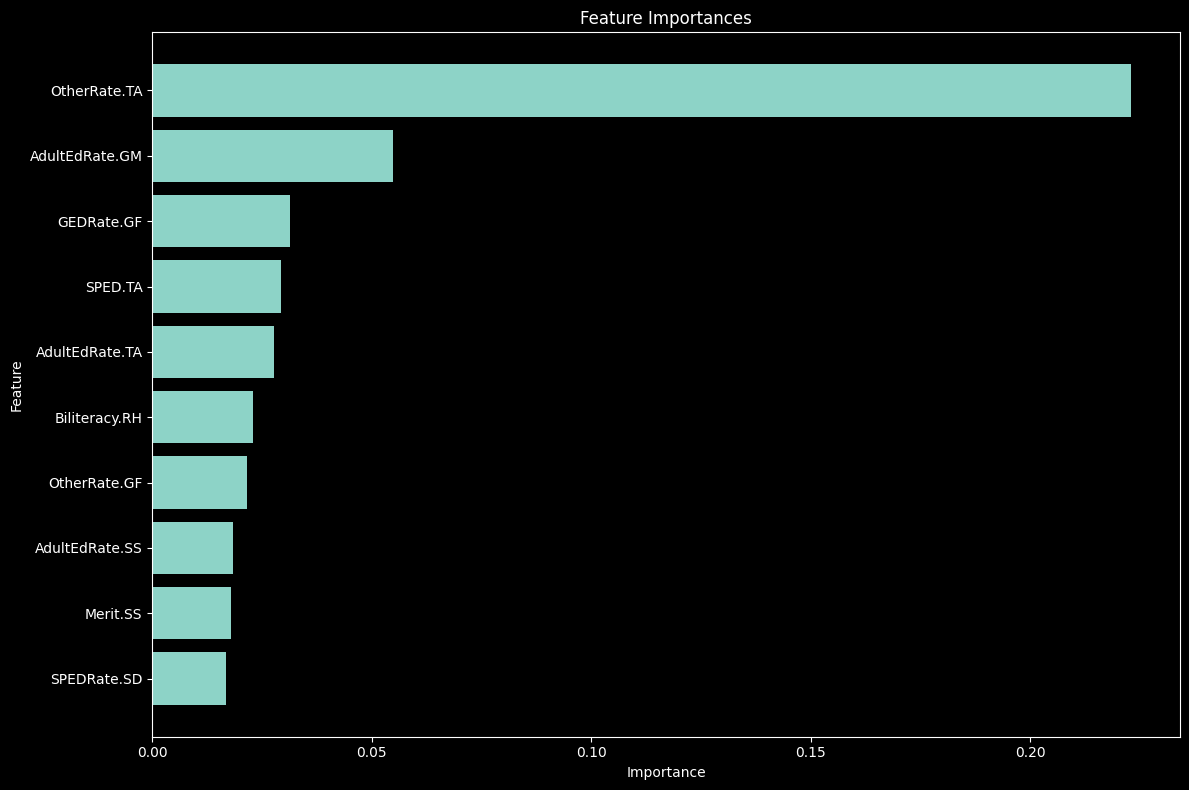

{'MSE': 26.62411391297551, 'RMSE': np.float64(5.159855997309955), 'MAE': 2.6462280879543254, 'R^2': 0.9650681999251832}


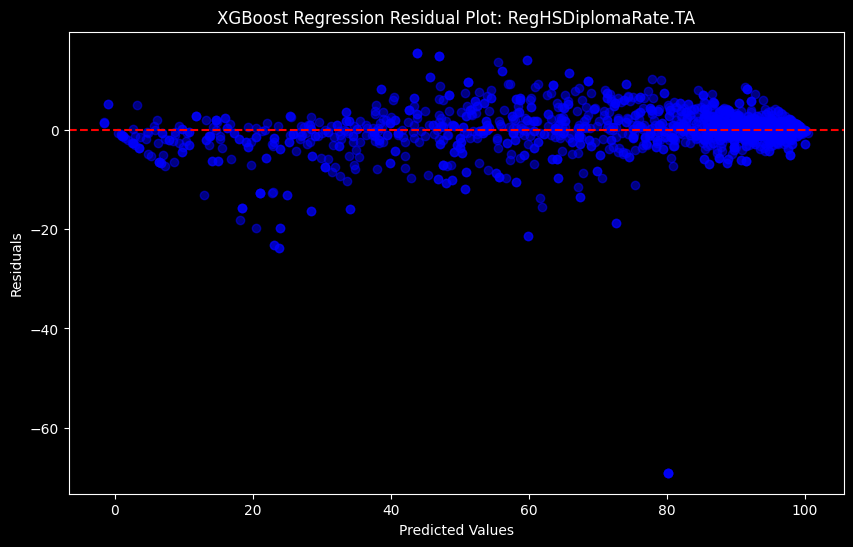

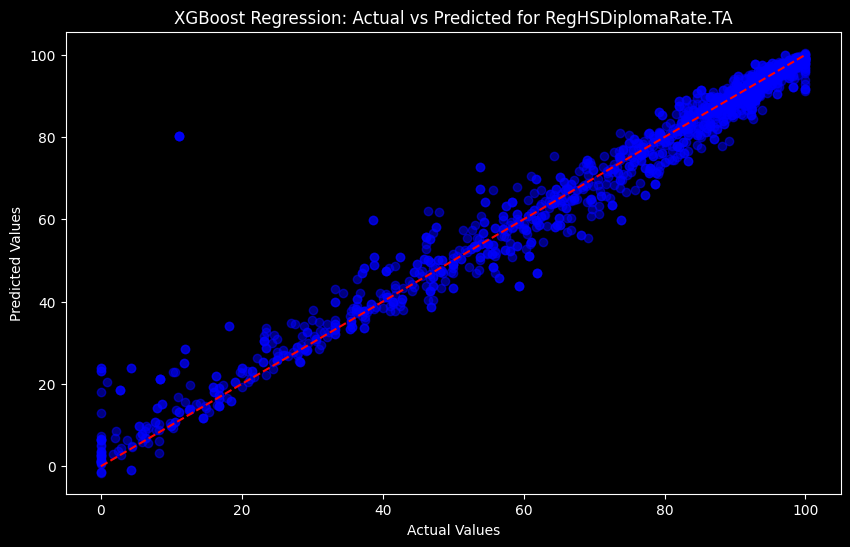

In [6]:
target_column = "RegHSDiplomaRate.TA"
xgb_results = xgb_utils.train_xgboost_model(df_2017_18, target_column, columns_to_drop)
print(xgb_results["metrics"])
xgb_utils.plot_xgb_residuals(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)
xgb_utils.plot_xgb_predicted_actual(
    xgb_results["y_test"], xgb_results["y_pred"], target_column
)

# Random Forest

Predict Graduation Rate

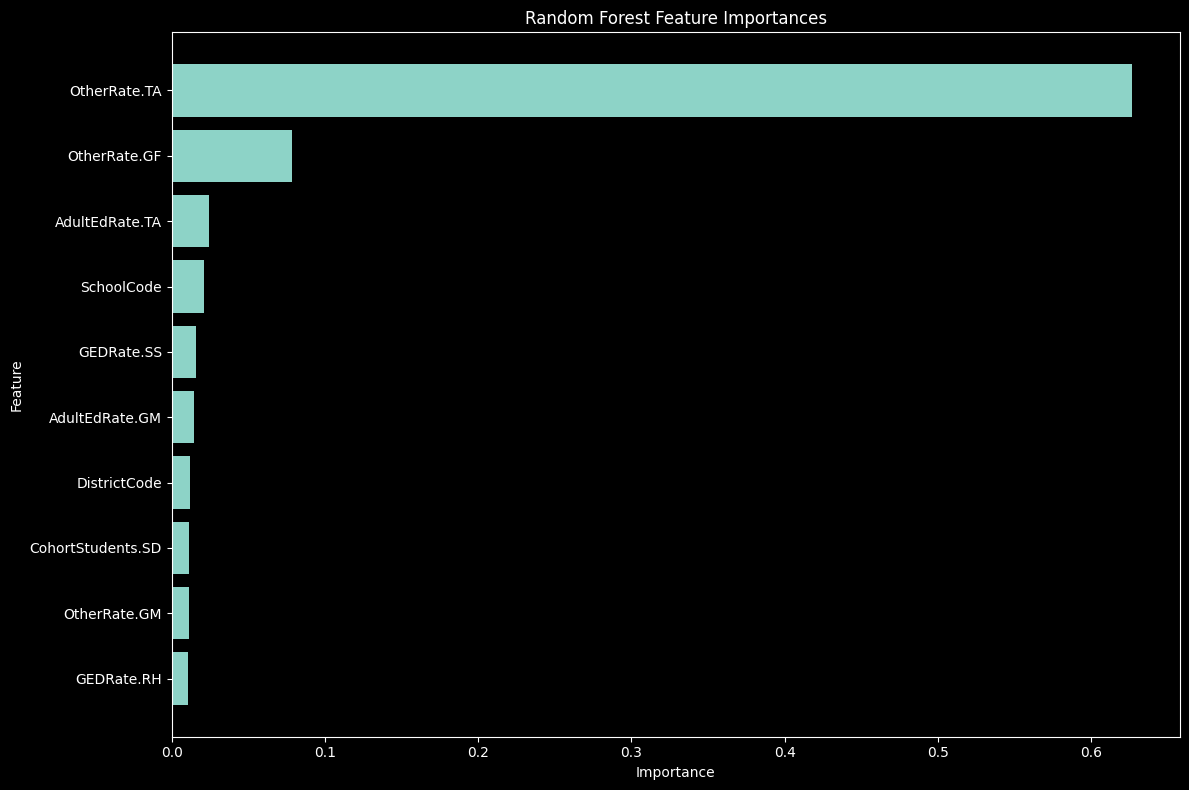

{'MSE': 14.683749426971087, 'RMSE': np.float64(3.8319380771316083), 'R²': 0.9807343898464287}


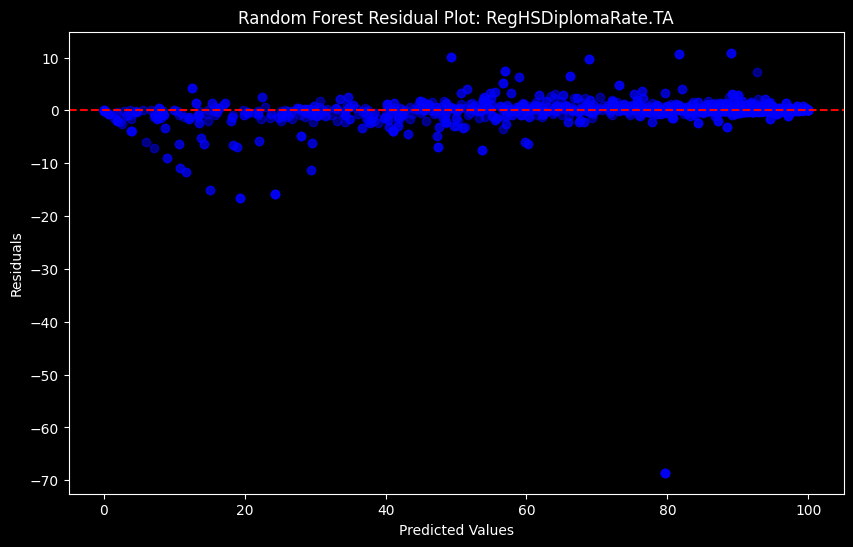

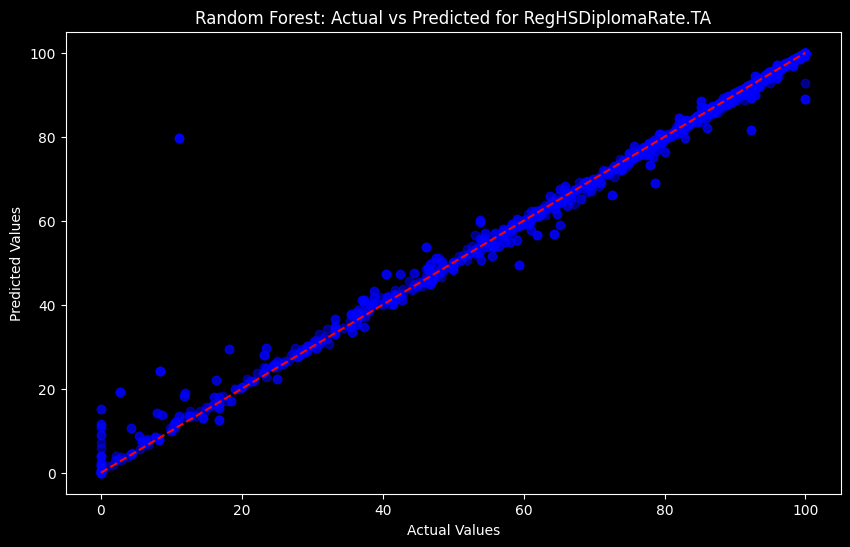

In [7]:
import utils.randomforest as rf_utils

rf_grad = rf_utils.train_random_forest_model(df_2017_18, "RegHSDiplomaRate.TA", columns_to_drop)
print(rf_grad["metrics"])
rf_utils.plot_rf_residuals(rf_grad["y_test"], rf_grad["y_pred"], "RegHSDiplomaRate.TA")
rf_utils.plot_rf_actual_predicted(rf_grad["y_test"], rf_grad["y_pred"], "RegHSDiplomaRate.TA")

Predict CSU/UC Readiness


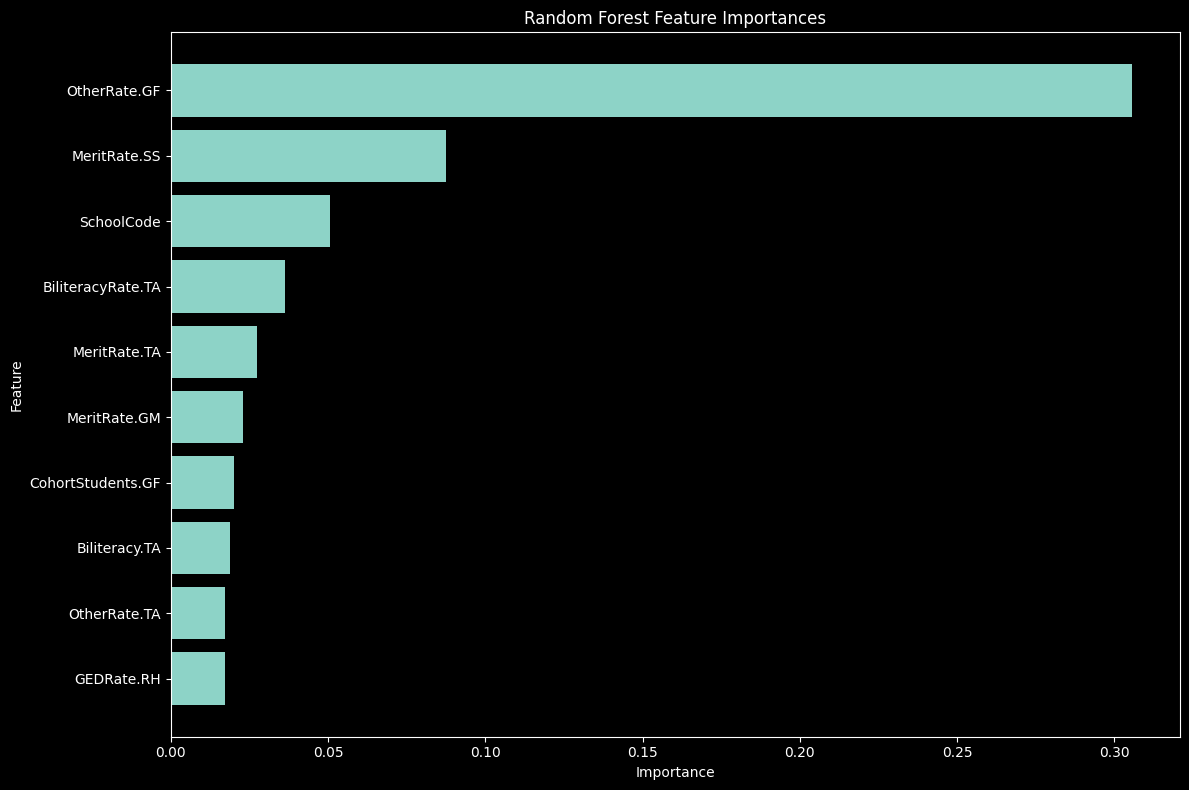

{'MSE': 8.451781300273973, 'RMSE': np.float64(2.9071947475657653), 'R²': 0.9919091646586307}


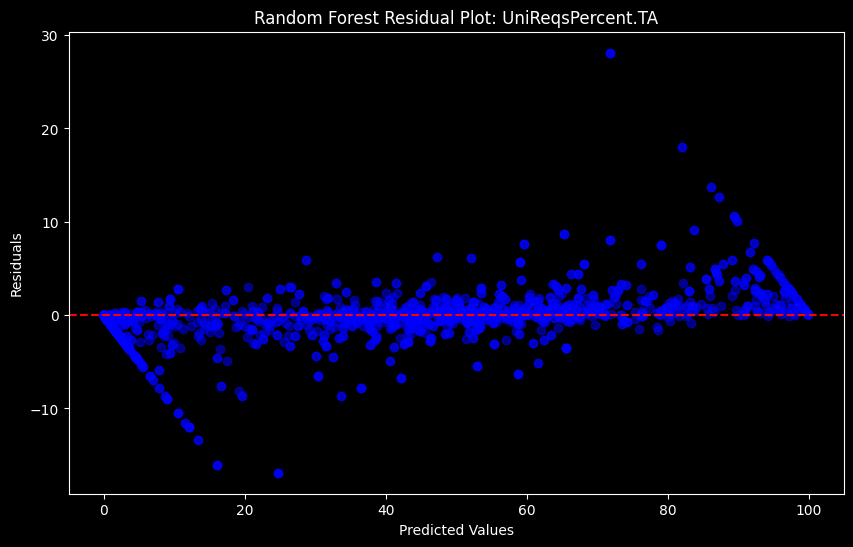

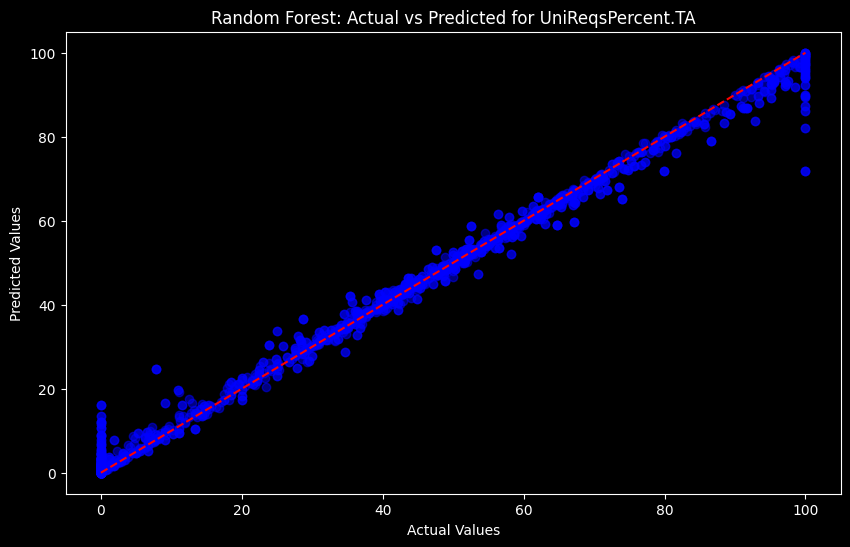

In [8]:
rf_uni = rf_utils.train_random_forest_model(df_2017_18, "UniReqsPercent.TA", columns_to_drop)
print(rf_uni["metrics"])
rf_utils.plot_rf_residuals(rf_uni["y_test"], rf_uni["y_pred"], "UniReqsPercent.TA")
rf_utils.plot_rf_actual_predicted(rf_uni["y_test"], rf_uni["y_pred"], "UniReqsPercent.TA")

Predict Dropout Rate

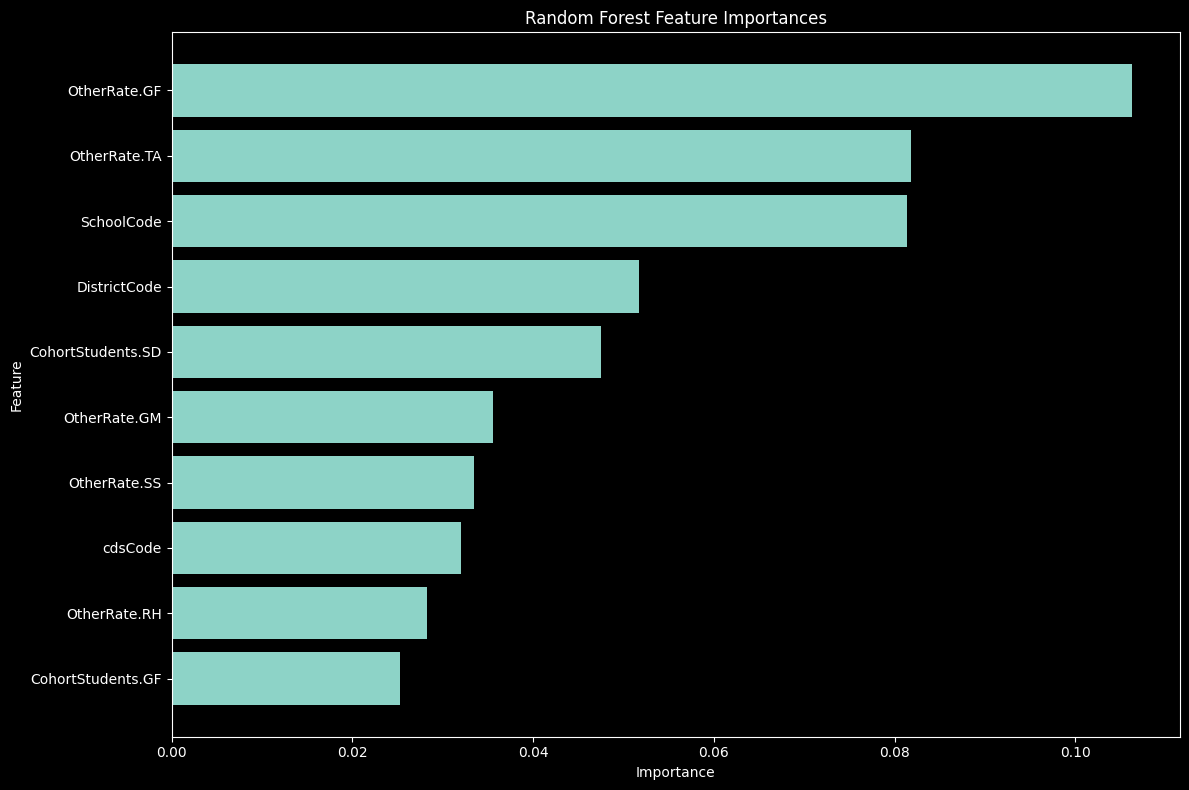

{'MSE': 11.793832845479448, 'RMSE': np.float64(3.4342150260983146), 'R²': 0.9453661026572421}


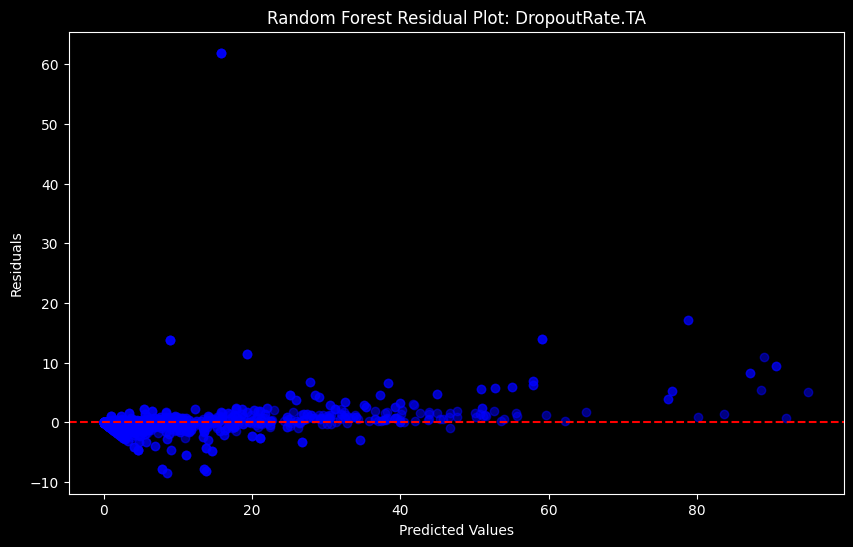

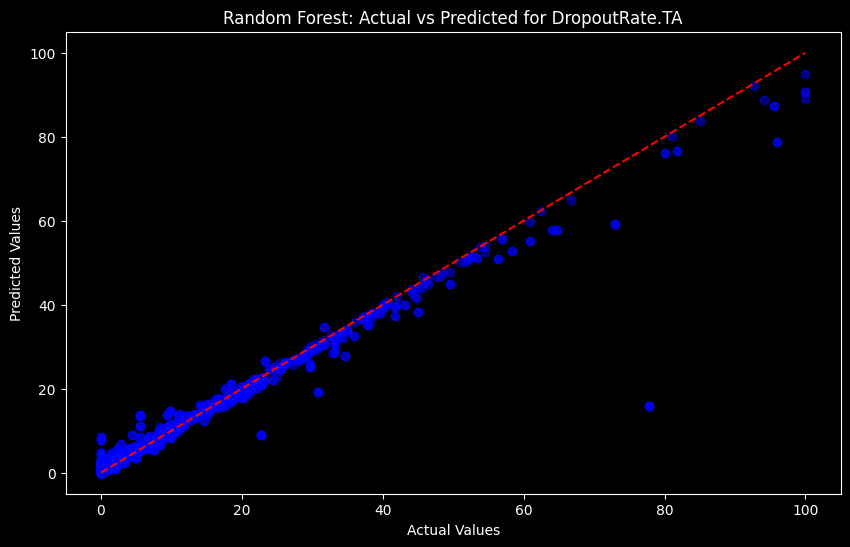

In [9]:
rf_dropout = rf_utils.train_random_forest_model(df_2017_18, "DropoutRate.TA", columns_to_drop)
print(rf_dropout["metrics"])
rf_utils.plot_rf_residuals(rf_dropout["y_test"], rf_dropout["y_pred"], "DropoutRate.TA")
rf_utils.plot_rf_actual_predicted(rf_dropout["y_test"], rf_dropout["y_pred"], "DropoutRate.TA")